# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/T5-TWI/Week 2/2 - Foundations of Machine Learning/5- Weekly Project/RTA_Dataset.csv')


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
# 1Find the dataset information and observe the datatypes.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
#2Check the shape of the data to understand its structure.

df.shape


(12316, 32)

In [ ]:
#3 View the the data with various functions to get an initial sense of the data.

# View first few rows also I can choice an number of the rows by adding between the ().
df.head()

# View last few rows , Also in here too I can in the end of rowes.
df.tail()

# View random sample of rows , Also in here too can be with chosicen number of samples or can be randomly.
df.sample(5)


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2367,16:00:00,Sunday,Unknown,Male,Elementary school,Employee,Above 10yr,Lorry (11?40Q),Organization,1-2yr,...,Entering a junction,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
8965,16:55:00,Thursday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Organization,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
7811,20:30:00,Friday,31-50,Male,Junior high school,Employee,1-2yr,Lorry (11?40Q),Owner,5-10yrs,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
7189,10:00:00,Saturday,Over 51,Male,Junior high school,Employee,2-5yr,Pick up upto 10Q,Owner,Unknown,...,Unknown,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
5655,1:29:00,Sunday,Over 51,Male,Elementary school,Employee,5-10yr,Stationwagen,Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury


In [ ]:
#4 Perform summary statistics on the dataset to grasp central tendencies and variability.||| it will devide the data as the type of it.

df.describe()


,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
#5 Check for duplicated data.|||| IN case there's an duplicated data we can remove it by this ***(df.drop_duplicates(inplace=True))***

df.duplicated().sum()


0

In [ ]:
#6 Check for null values.

df.isnull().sum()


,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
#Adding ##for the null of rows Drop with null values by the below comm:
# df.dropna(inplace=True)

#Label the data regarding in which colomin I need:

#'Accident_severity' is the needed column and  label encoding
le = LabelEncoder()
df['Accident_severity'] = le.fit_transform(df['Accident_severity'])


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [ ]:
#1 Handling Missing Values:
#Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.

# Filling missing values with the mean for numerical columns || will print the numric result
#list of column names stored in numerical_cols.

numerical_cols = df.select_dtypes(include=['float', 'int']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


# Filling missing values with the mode for categorical columns |||list of column names stored in categorical_cols.
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [ ]:
#Normalization/Scaling: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
# 3 Label Encoding: Convert categorical text data into model-understandable numbers where the labels are ordered.

# Converts categorical values to numerical
label_encoder = LabelEncoder()

# Iterate for categorical columns and apply label encoding
for column in categorical_cols:
  df[column] = label_encoder.fit_transform(df[column])


In [ ]:
# 4 One-Hot Encoding: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category.
 #(Be careful not to increase the dimensionality significantly)

# One-Hot Encoding: Use for nominal categorical data where no ordinal relationship exists
# to transform the data into a binary column for each category.
# (Be careful not to increase the dimensionality significantly)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)




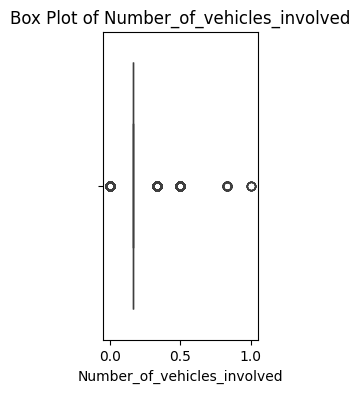

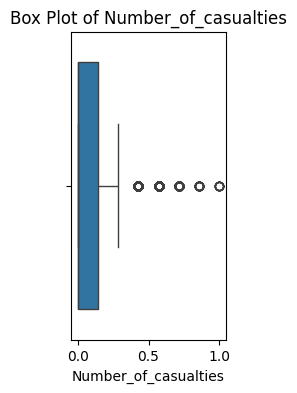

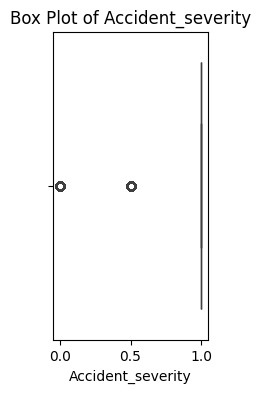

In [ ]:
# 5.1) Detection and Treatment of Outliers: Use statistical tests by box plots

# Detection and Treatment of Outliers: Use statistical tests by box plots


# Iterate through numerical columns and create box plots
for column in numerical_cols:
  plt.figure(figsize=(2, 4))  # Adjust figure size as needed depeond on what i want
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column}')
  plt.show()

# 5.2) use trim method to reduce the effect of outliers, depending on the context.

# Iterate through numerical columns and trim outliers
for column in numerical_cols:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.clip(df[column], lower_bound, upper_bound)

In [ ]:
######. NEW FEAUTRE ENG.


#1: Creating a new feature 'Time_Category' based on 'Time' column
def categorize_time(time):
  if time >= 5 and time < 12:
    return 'Morning'
  elif time >= 12 and time < 17:
    return 'Afternoon'
  elif time >= 17 and time < 21:
    return 'Evening'
  else:
    return 'Night'

df['Time_Category'] = df['Time'].apply(categorize_time)

# 2: Applying transformation to 'Age_band_of_driver'
df['Age_band_of_driver_log'] = np.log1p(df['Age_band_of_driver'])


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

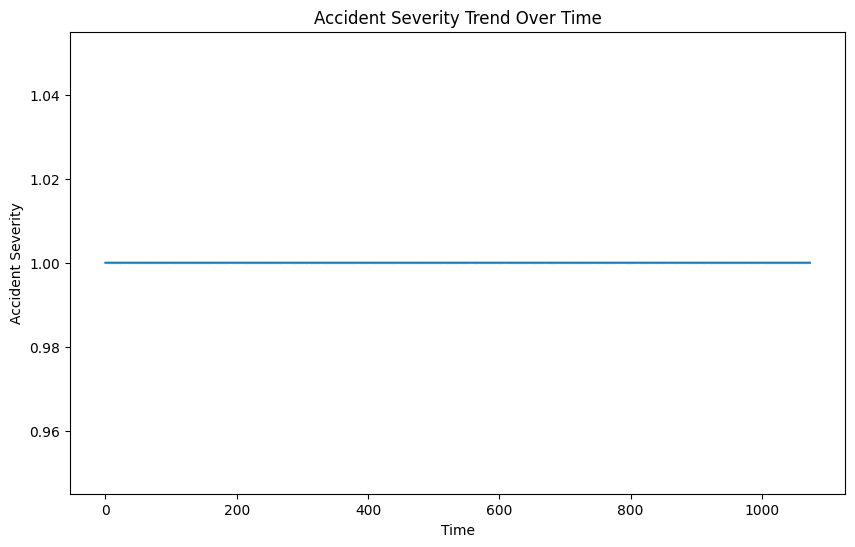

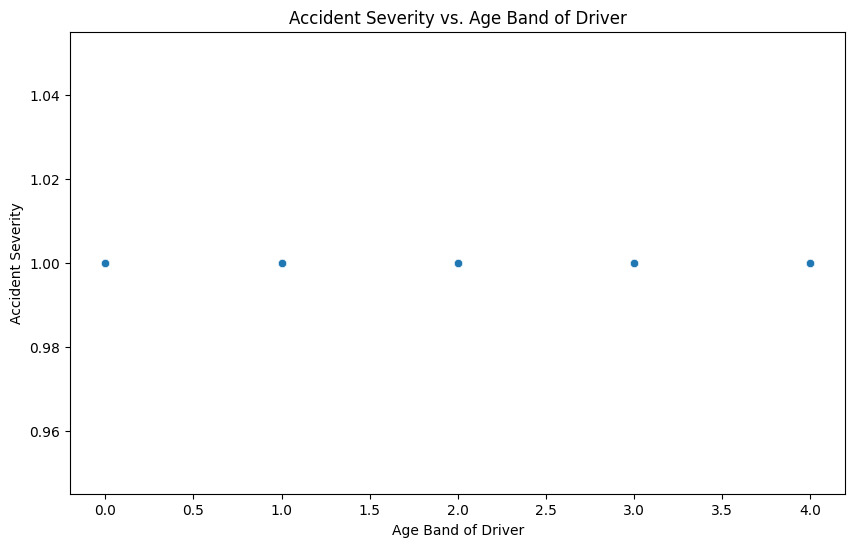

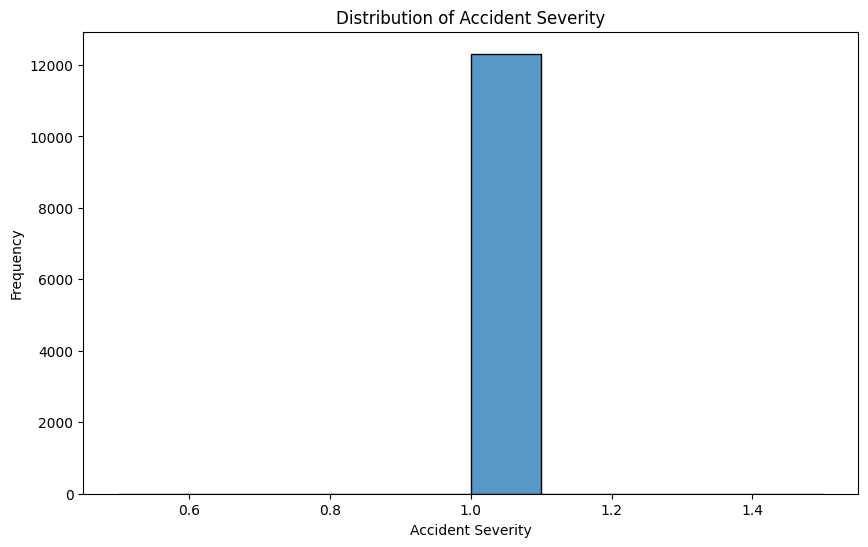

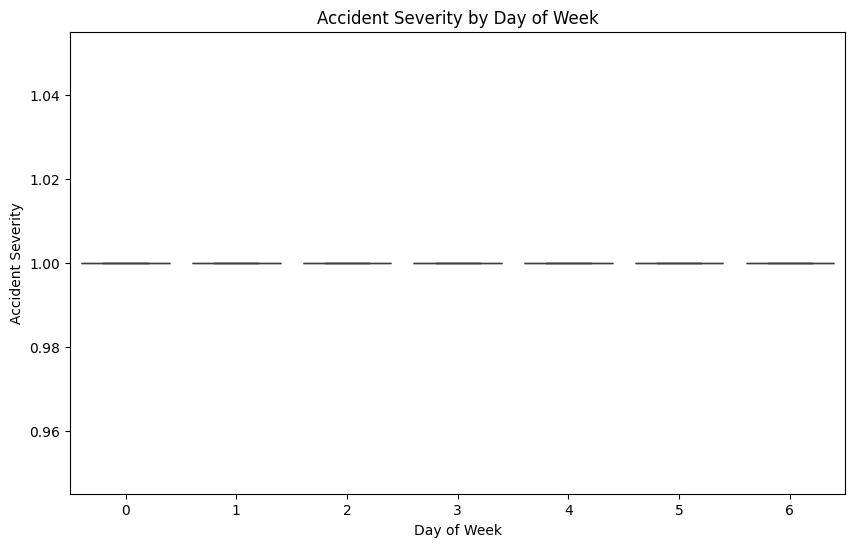

In [ ]:
import matplotlib.pyplot as plt



# Line plots
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Accident_severity', data=df)
plt.title('Accident Severity Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Accident Severity')
plt.show()

# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_band_of_driver', y='Accident_severity', data=df)
plt.title('Accident Severity vs. Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Accident Severity')
plt.show()

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['Accident_severity'], bins=10)
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.show()

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_week', y='Accident_severity', data=df)
plt.title('Accident Severity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Accident Severity')
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [ ]:
# 2: Divide the dataset into training and testing sets to evaluate the performance of your models

from sklearn.model_selection import train_test_split

# I took the 'Accident_severity' as  target variable for me:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

# Split the data into training and testing sets ( 80% train, 20% test) there's no specific devition it's regarding on what i need to be:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)


ValueError: could not convert string to float: 'Night'

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# choice the model
tree_clf = DecisionTreeClassifier()

# Train the model on my frame data
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.2f}')

ValueError: could not convert string to float: 'Night'

#### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC()

# Train the model

svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.2f}')


ValueError: The number of classes has to be greater than one; got 1 class

#### K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'K-NN Accuracy: {accuracy:.2f}')

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Assuming y_test and y_pred are already defined from your model training

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 3. Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

# 4. F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# 5. ROC Curve and AUC (For binary classification problems)
# If you have a multiclass problem, you might need to adapt this for each class
# For example, for class 0:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=0)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# You can plot the ROC curve if needed
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'y_test' is not defined

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

In [ ]:
#1) Compare Metrics: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing:
   --Analyzing results depend on insights model performs and based on the metrics I do trained

#2) Evaluate Trade-offs: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
   ---depends on the specific requirements I have ,So mine easy so Train-Test Split.
 -3-  providing a clear and simple way to test how well a model generalizes to new data


